In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
data_path = '../Materials/data/'

In [18]:
mvr_grid = np.loadtxt(data_path+"mvr_grid_rs.txt")
dvr_grid = np.loadtxt(data_path+"dvr_grid_rs.txt")
logL_grid = np.loadtxt(data_path+"logL_grid_rs.txt")
chain = np.loadtxt(data_path+'chain_Cas3_rs.txt')

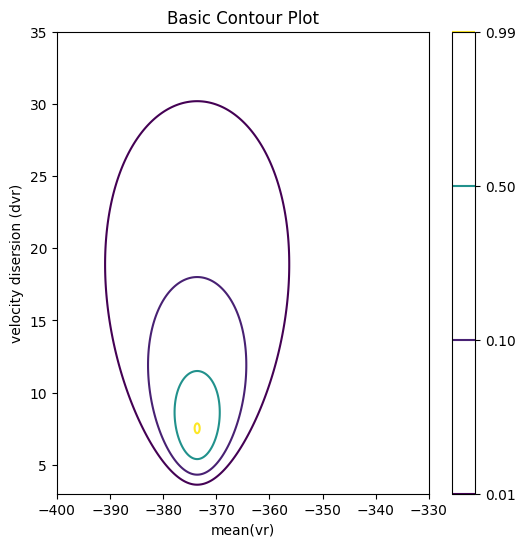

In [19]:
# This is the contour plot of Likelihood, we want it to be normalized to the maximum value
levels = np.array([0.01, 0.1, 0.5, 0.99])
plt.figure(figsize=(6,6))
contour = plt.contour(mvr_grid, dvr_grid, np.exp(logL_grid.T-np.max(logL_grid)), levels=levels)
cbar = plt.colorbar(contour)  # Add colorbar

plt.title('Basic Contour Plot')
plt.xlabel('mean(vr)')
plt.ylabel('velocity disersion (dvr)')
plt.show()

In [28]:
pdf_mvr = np.arange(len(mvr_grid))
pdf_dvr = np.arange(len(dvr_grid))

for i in range(len(mvr_grid)):

    pdf_mvr[i] = np.exp(logL_grid[i, :]-np.max(logL_grid)).sum()
    pdf_dvr[i] = np.exp(logL_grid[:, i]-np.max(logL_grid)).sum()


pdf_mvr = pdf_mvr/pdf_mvr.sum()
pdf_dvr = pdf_dvr/pdf_dvr.sum()

# Now we can get the 16th and 84th percentile of each PDFs
grid = np.arange(len(mvr_grid))
likelihood_mvr = np.zeros(len(grid))
likelihood_dvr = np.zeros(len(grid))


for i in range (len(grid)):

    ind = grid <= grid[i]

    likelihood_mvr[i] = pdf_mvr[ind].sum()
    likelihood_dvr[i] = pdf_dvr[ind].sum()

ind_16 =  likelihood_dvr >= 0.16
ind_84 =  likelihood_dvr >= 0.84
ind_50 =  likelihood_dvr >= 0.5

print ("%.1f"%dvr_grid[ind_16][0], "%.1f"%dvr_grid[ind_50][0], "%.1f"%dvr_grid[ind_84][0])


ind1 = pdf_dvr >= np.exp(-0.5)*pdf_dvr.max()
print ("%.1f"%dvr_grid[ind1][0], "%.1f"%dvr_grid[ind1][-1])
ind_max = np.argmax(pdf_dvr)
print ("%.1f"%dvr_grid[ind_max])

7.4 10.7 17.2
6.1 12.5
8.1


Text(0, 0.5, 'PDF ($\\sigma_{vr}$)')

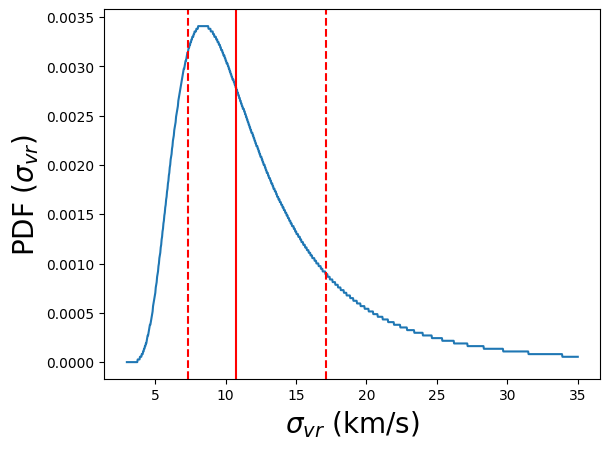

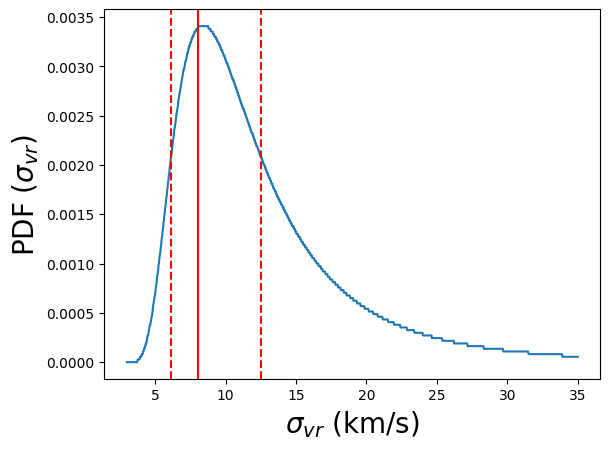

In [35]:
plt.figure()
plt.plot(dvr_grid, pdf_dvr, label='PDF mean(vr)')
plt.axvline(dvr_grid[ind_16][0], color='red', linestyle='--', label='16th percentile')
plt.axvline(dvr_grid[ind_50][0], color='red', linestyle='-', label='50th percentile')
plt.axvline(dvr_grid[ind_84][0], color='red', linestyle='--', label='84th percentile')
plt.xlabel (r'$\sigma_{vr}$ (km/s)', fontsize=20)
plt.ylabel (r'PDF ($\sigma_{vr}$)', fontsize=20)


plt.figure()
plt.plot(dvr_grid, pdf_dvr, label='PDF mean(vr)')
plt.axvline(dvr_grid[ind1][0], color='red', linestyle='--')
plt.axvline(dvr_grid[ind1][-1], color='red', linestyle='--')
plt.axvline(dvr_grid[ind_max], color='red', linestyle='-')

plt.xlabel (r'$\sigma_{vr}$ (km/s)', fontsize=20)
plt.ylabel (r'PDF ($\sigma_{vr}$)', fontsize=20)

7.4
11.1
18.6


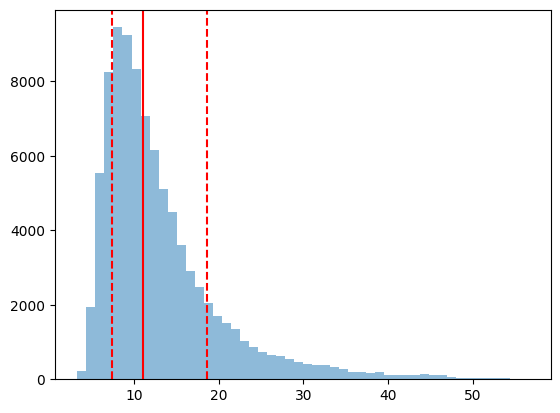

In [23]:
plt.figure()
plt.hist(chain[:,1], bins=50, alpha=0.5, label='mvr');
plt.axvline(np.percentile(chain[:,1], 16), color='red', linestyle='--', label='16th percentile')
plt.axvline(np.percentile(chain[:,1], 50), color='red', linestyle='-', label='50th percentile')
plt.axvline(np.percentile(chain[:,1], 84), color='red', linestyle='--', label='84th percentile')

print ("%.1f"%np.percentile(chain[:,1], 16))
print ("%.1f"%np.percentile(chain[:,1], 50))
print ("%.1f"%np.percentile(chain[:,1], 84))